<a href="https://colab.research.google.com/github/Samir-Doghmi/Data_Science_Lab/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import calendar
import matplotlib
import matplotlib.ticker as ticker
from datetime import datetime
import holidays
from holidays import CountryHoliday

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Dataset_exploration.csv', parse_dates=['Time'])
df['Time'] = pd.to_datetime(df['Time']).dt.time

In [ ]:
#Connect to SQlite database
connection= sqlite3.connect('demo.db')
df.to_sql('ecommerce', connection, if_exists= 'replace')


376418

In [ ]:
cursor = connection.cursor()

In [ ]:
df

,id,marchio,descrizione,settore,categoria,qta,prezzo,Data,Time,Anno,Mese,Giorno,Settimana,Giorno_della_settimana,Sales,Hour,RICOVERI
0,37586,Protest,Pantalone imbottito,Snowboard,Invernale,1,408.870,2015-04-24,12:32:12,2015,4,24,17,venerdì,408.870,12,NaN
1,43076,Nike,Neutre,Running,Outdoor,1,582.330,2015-06-22,23:43:55,2015,6,22,26,lunedì,582.330,23,NaN
2,36396,Nike,Pallone,Calcio,Squadra,1,103.250,2015-04-11,02:10:58,2015,4,11,15,sabato,103.250,2,NaN
3,39259,Skechers,Scarpa,Fitness,Indoor,1,329.987,2015-05-14,20:30:03,2015,5,14,20,giovedì,329.987,20,NaN
4,41154,Adidas,Pantaloncino ufficiale,Calcio,Squadra,1,45.430,2015-06-05,12:39:46,2015,6,5,23,venerdì,45.430,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376413,404884,Shimano,Esche artificiali,Pesca,Outdoor,1,24.367,2023-04-04,14:38:55,2023,4,4,14,martedì,24.367,14,189.0
376414,404885,Shimano,Esche artificiali,Pesca,Outdoor,1,24.367,2023-04-04,14:38:55,2023,4,4,14,martedì,24.367,14,189.0
376415,404886,Dohna,Esche artificiali,Pesca,Outdoor,1,35.105,2023-04-04,14:38:55,2023,4,4,14,martedì,35.105,14,189.0
376416,404894,Bodyline,Cardiofrequenzimetro,Running,Outdoor,1,218.064,2023-04-04,18:38:47,2023,4,4,14,martedì,218.064,18,189.0


# Data Integration

## Covid

In [ ]:
# we create a new dataframe where the Ricoveri column has a greater value
covid= df[df['RICOVERI'] > 0][['RICOVERI', 'Data', 'Sales']]

# We group rows on Data column and then we sum sales, while Ricoveri value is taken from first row of each data group. In this way the number of hospitalizations the same for each day
ok= covid.groupby(['Data'], as_index= False).agg({'RICOVERI': 'first', 'Sales': 'sum'})
ok

,Data,RICOVERI,Sales
0,2020-01-03,440.0,33113.8031
1,2020-01-04,1527.0,34385.1410
2,2020-01-05,294.0,37923.4359
3,2020-01-06,150.0,26897.5749
4,2020-01-07,74.0,43553.8649
...,...,...,...
1114,2023-03-31,184.0,14704.2868
1115,2023-04-01,476.0,17205.3735
1116,2023-04-02,242.0,12383.1029
1117,2023-04-03,166.0,14706.0214


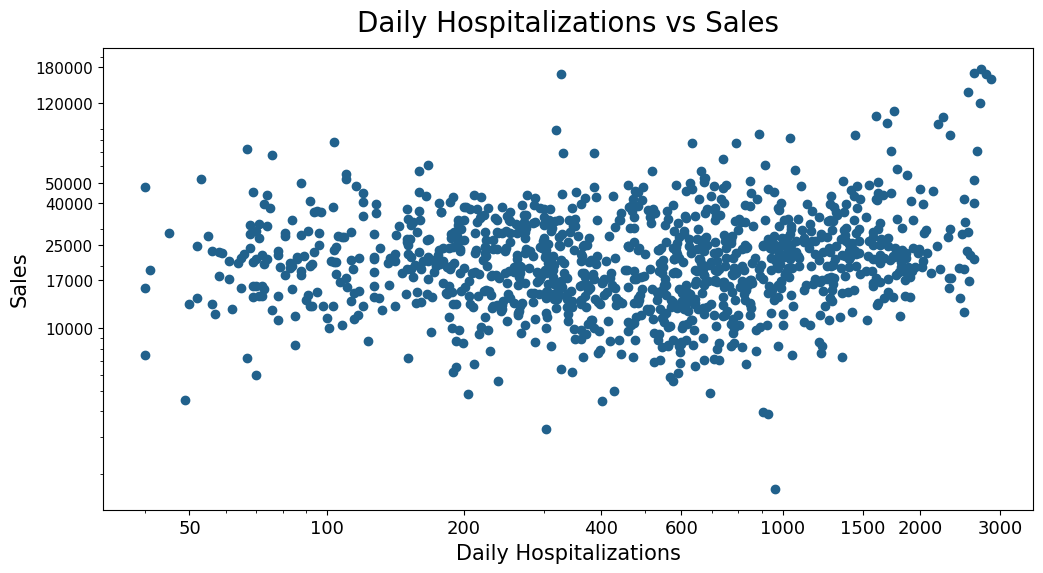

In [ ]:
# Scatter plot Daily Hospitalizations vs Sales

plt.figure(figsize=(12, 6))
plt.scatter(ok['RICOVERI'], ok['Sales'], color='#21618C')
plt.xlabel('Daily Hospitalizations', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title('Daily Hospitalizations vs Sales', fontsize=20, pad= 12)
plt.xticks(fontsize=13)
plt.yticks(np.arange(1700, 180000, 15000), fontsize=11)

# Set x-axis and y-axis to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Set the tick locators for the logarithmic scale
plt.gca().xaxis.set_major_locator(ticker.LogLocator())
plt.gca().yaxis.set_major_locator(ticker.LogLocator())

# Set the tick formatters to display the labels in normal scale
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())

# Set additional tick positions and labels for x-axis
additional_xticks = [ 50, 100,  200, 400,600, 1000, 2000, 3000, 1500]  # Add more values as needed
plt.gca().set_xticks(additional_xticks)
plt.gca().set_xticklabels(additional_xticks)

# Set additional tick positions and labels for y-axis
additional_yticks = [180000, 40000, 17000, 25000, 50000, 10000, 120000]  # Add more values as needed
plt.gca().set_yticks(additional_yticks)
plt.gca().set_yticklabels(additional_yticks)

plt.show()

In [ ]:
# We compute covariance and correlation among the two columns Ricoveri and sales
covariance = np.cov(ok['RICOVERI'], ok['Sales'])[0, 1]
corr = np.corrcoef(ok['RICOVERI'], ok['Sales'])[0, 1]
print("Covariance:", corr, "Covariance:", covariance)

Covariance: 0.2639883192368683 Covariance: 2570124.3934850986


 Most of the observations seem to be concentrated in the range between 50,000
and 15,000 thousand euros. The points are randomly arranged
in the plane, showing an undefined pattern.This suggests the presence of a slight association between
the two variables.The relatively low correlation between the
two variables, computed to be 0.26, supports this observation,
indicating a positive but not strong association between daily
hospitalizations and sales.

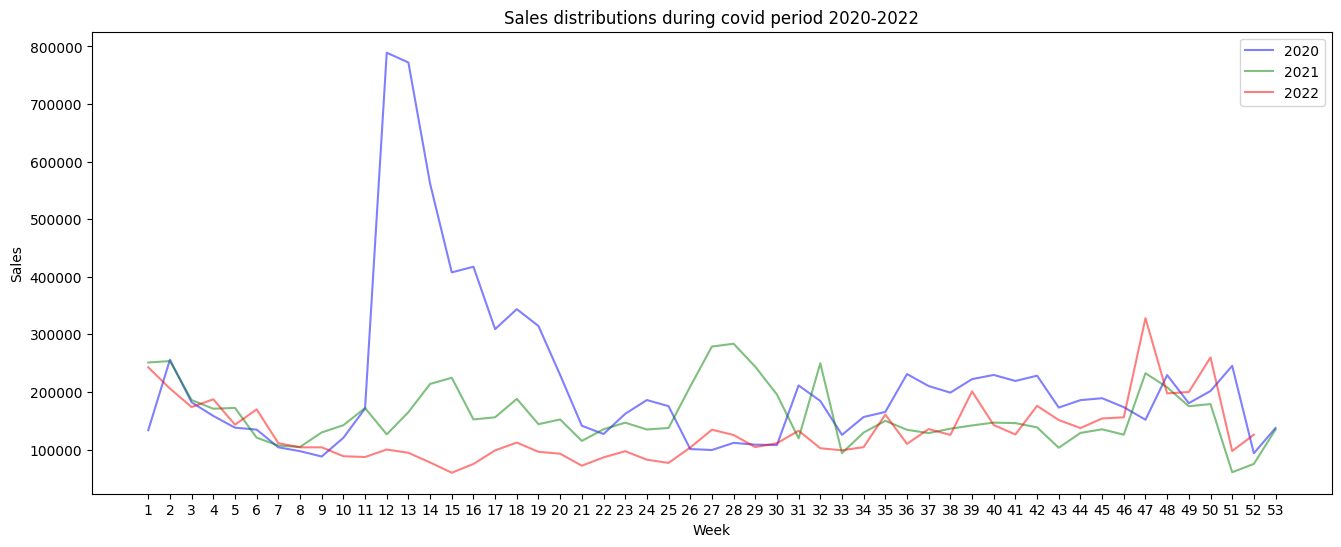

In [ ]:
# Sales distributions during covid period 2020-2022

covid_2020= df[df['Anno'] == 2020]
covid_2021= df[df['Anno'] == 2021]
covid_2022= df[df['Anno'] == 2022]
#2020
covid_2020 = covid_2020.pivot_table(index='Settimana', values='Sales', aggfunc='sum')
covid_2020.index = covid_2020.index.astype(str)
#2021
covid_2021 = covid_2021.pivot_table(index='Settimana', values='Sales', aggfunc='sum')
covid_2021.index = covid_2021.index.astype(str)
#2022
covid_2022 = covid_2022.pivot_table(index='Settimana', values='Sales', aggfunc='sum')
covid_2022.index = covid_2022.index.astype(str)


plt.figure(figsize=(16, 6))
plt.plot(covid_2020.index, covid_2020['Sales'], color='blue', alpha=0.5, label='2020')
plt.plot(covid_2021.index, covid_2021['Sales'], color='green', alpha=0.5, label='2021')
plt.plot(covid_2022.index, covid_2022['Sales'], color='red', alpha=0.5, label='2022')

# Aggiunta delle etichette degli assi e del titolo del grafico
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Sales distributions during covid period 2020-2022')

# Aggiunta della legenda
plt.legend()

# Mostra il grafico
plt.show()

There was a significant increase in sales during weeks 11 to 15 in the year 2020, while the other years displayed more consistent sales patterns.

## Winter and summer markdowns and Black Fridays

Another factor that we consider as a potential influencing
driver on sales is periodic markdown events. These periods
represent times of the year when companies liquidate their
remaining stock at significant discounts.
In our variables we decided to include Black Friday as well as
winter and summer markdowns.

### Black Friday

In [ ]:
cursor.execute('''
    SELECT
         Anno, Giorno,
        ROUND(MAX(TotalSales),2) AS MaxSales
    FROM (
        SELECT
            Giorno, Anno,
            SUM("Sales_(k€)") AS TotalSales
        FROM
            ecommerce
        WHERE
            Mese = '11'
        GROUP BY
            Anno, Giorno
    ) AS subquery
    GROUP BY
    Anno
''')
result =cursor.fetchall()
result
#below are the blackfriday days for each year:
#2013:  29
#2014:  28
#2015:  27
#2016:  25 si
#2017:  24 si
#2018:  23 si
#2019:  29 si
#2020:  27 si
#2021:  26 si
#2022:  25

[(2013, 1, 0.0),
 (2014, 1, 0.0),
 (2015, 1, 0.0),
 (2016, 1, 0.0),
 (2017, 1, 0.0),
 (2018, 1, 0.0),
 (2019, 1, 0.0),
 (2020, 1, 0.0),
 (2021, 1, 0.0),
 (2022, 1, 0.0)]

Our assumption about Black Friday markdowns have been fairly confirmed: 6 out of 10 days with the highest amount of sales for November effectively correspond with the day we expected. This trend is true for the years 2016-2021.

### Winter Markdowns

Markdowns dates vary from year to year and are subject to decisions by local or regional authorities. Below we have formulated approximate periods nationwide.

In [ ]:
#SAaldi invernali

# 2013:  5/01 - 5/03
#2014:  4/01 - 4/03
# 2015:  5/01 - 5/03
# 2016:  2/01 - 1/03
# 2017:  4/01 - 28/02
# 2018:  5/01 - 28/02
# 2019:  5/01 - 5/03
# 2020:  4/01 - 3/03
# 2021:  2/01 - 7/03
# 2022:  5/01 - 5/03
saldi_invernali = df[
   ((df['Data'] >= '2013-01-05') & (df['Data'] <= '2013-03-05')) |
    ((df['Data'] >= '2014-01-04') & (df['Data'] <= '2014-03-04')) |
    ((df['Data'] >= '2015-01-05') & (df['Data'] <= '2015-03-05')) |
    ((df['Data'] >= '2016-01-02') & (df['Data'] <= '2016-03-01')) |
    ((df['Data'] >= '2017-01-04') & (df['Data'] <= '2017-02-28')) |
    ((df['Data'] >= '2018-01-05') & (df['Data'] <= '2018-02-28')) |
    ((df['Data'] >= '2019-01-05') & (df['Data'] <= '2019-03-05')) |
    ((df['Data'] >= '2020-01-04') & (df['Data'] <= '2020-03-03')) |
    ((df['Data'] >= '2021-01-02') & (df['Data'] <= '2021-03-07')) |
    ((df['Data'] >= '2022-01-05') & (df['Data'] <= '2022-03-05'))
]


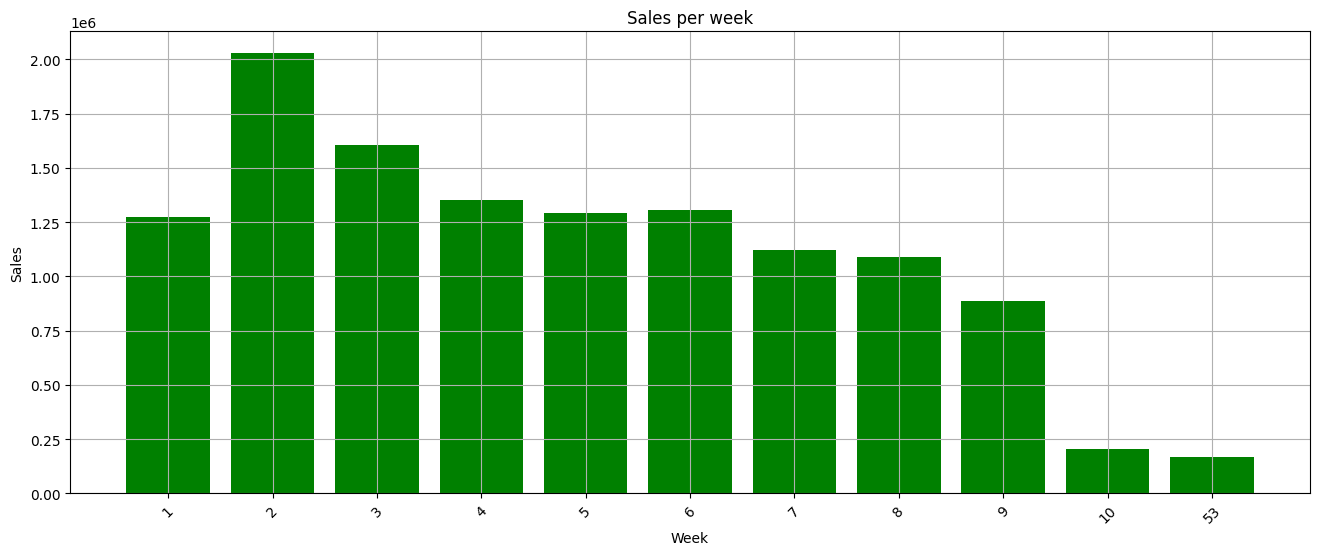

In [ ]:
# In what week is most shopping done during the winter sales?
summed_sales = saldi_invernali.pivot_table(index='Settimana', values='Sales', aggfunc='sum')
summed_sales.index = summed_sales.index.astype(str)
# Plotting the total sales per week
plt.figure(figsize=(16, 6))
plt.bar(summed_sales.index,summed_sales['Sales'], color='green')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Sales per week')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

There is a surge in sales only in the first phase, while the trend gradually decreases as the days go by.

In [ ]:
#Product most profitable during winter markdowns

# Creating a separate column for each specified date using the pivot_table method and grouping by sector
pivot_data = saldi_invernali.pivot_table(index=['settore', 'descrizione', 'marchio'], values='Sales', aggfunc='sum')
pivot_data = pivot_data.sort_values(by='Sales', ascending=False)


# Convert the index to string
pivot_data.index = pivot_data.index.map(str)
pivot_data.head(10)

,Sales
"('Pesca', 'Mulinelli', 'Shimano')",358354.7723
"('Casual', 'Scarpa', 'Nike')",353771.0505
"('Calcio', 'Scarpa terreni duri', 'Adidas')",298205.1632
"('Casual', 'Scarpa', 'Adidas Originals')",273389.2322
"('Calcio', 'Scarpa terreni duri', 'Nike')",252174.2069
"('Casual', 'Scarpa', 'Adidas')",248625.1740
"('Casual', 'Piumino ', 'Colmar Originals')",216213.7600
"('Pesca', 'Mulinelli', 'Trabucco')",177363.3869
"('Sci', 'Doposci', 'Tecnica')",169336.6080
"('Pesca', 'Canne da pesca', 'Trabucco')",161440.9566


### Summer Markdowns

As already mentioned above,here too,  we have formulated an approximate summer markdowns period.

In [ ]:
#2013: 6/07- 31/08
#2014: 5/07 - 30/08
#2015: 4/07 - 01/09
#2016: 2/07 - 27/08
#2017: 1/07-  30/08
#2018: 7/07 - 30/08
#2019: 6/07 - 03/09
#2020: 1/08 - 29/09
#2021: 3/07 - 31/08
#2022: 2/07 - 30/08

saldi_estivi = df[
   ((df['Data'] >= '2013-07-06') & (df['Data'] <= '2013-08-31')) |
    ((df['Data'] >= '2014-07-05') & (df['Data'] <= '2014-08-30')) |
    ((df['Data'] >= '2015-07-04') & (df['Data'] <= '2015-09-01')) |
    ((df['Data'] >= '2016-07-02') & (df['Data'] <= '2016-08-27')) |
    ((df['Data'] >= '2017-07-01') & (df['Data'] <= '2017-08-30')) |
    ((df['Data'] >= '2018-07-07') & (df['Data'] <= '2018-08-30')) |
    ((df['Data'] >= '2019-07-06') & (df['Data'] <= '2019-09-03')) |
    ((df['Data'] >= '2020-08-01') & (df['Data'] <= '2020-09-29')) |
    ((df['Data'] >= '2021-07-03') & (df['Data'] <= '2021-08-31')) |
    ((df['Data'] >= '2022-07-02') & (df['Data'] <= '2022-09-31'))
]


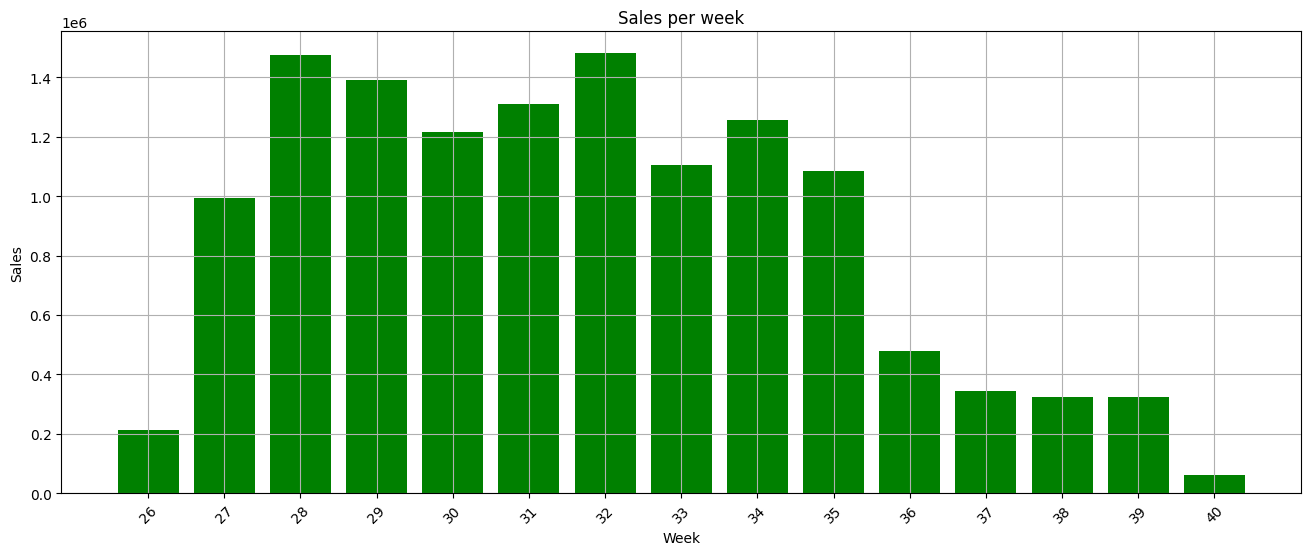

In [ ]:
# In what week is most shopping done during the winter sales?
summed_sales = saldi_estivi.pivot_table(index='Settimana', values='Sales', aggfunc='sum')
summed_sales.index = summed_sales.index.astype(str)
# Plotting the total sales per week
plt.figure(figsize=(16, 6))
plt.bar(summed_sales.index,summed_sales['Sales'], color='green')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Sales per week')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

The summer markdowns exhibit a u-shape curve: with
sales that reach 1,5 Million in July, just before the summer
break, with this threshold being exceeded again in the first
week of September, probably corresponding to the return
to everyday life and the resumption of sports facilities and
activities.

In [ ]:
#Product most profitable during summer markdowns

# Creating a separate column for each specified date using the pivot_table method and grouping by sector
pivot_data = saldi_estivi.pivot_table(index=['settore', 'descrizione', 'marchio'], values='Sales', aggfunc='sum')
pivot_data = pivot_data.sort_values(by='Sales', ascending=False)


# Convert the index to string
pivot_data.index = pivot_data.index.map(str)
pivot_data.head(10)

,Sales
"('Calcio', 'Scarpa terreni duri', 'Nike')",669411.8760
"('Calcio', 'Scarpa terreni duri', 'Adidas')",666187.5024
"('Pesca', 'Mulinelli', 'Shimano')",381303.1173
"('Casual', 'Scarpa', 'Nike')",282192.0381
"('Casual', 'Scarpa', 'Adidas')",270915.8165
"('Calcio', 'Varie abbigliamento', 'Club Milano')",248292.2960
"('Casual', 'Scarpa', 'Adidas Originals')",233549.1046
"('Calcio', 'Varie abbigliamento', 'Seregno Calcio')",212647.7528
"('Pesca', 'Canne da pesca', 'Trabucco')",211034.9052
"('Pesca', 'Mulinelli', 'Trabucco')",200701.3561


In this aggregate bar-chart we show winter and summer markdowns across different weeks

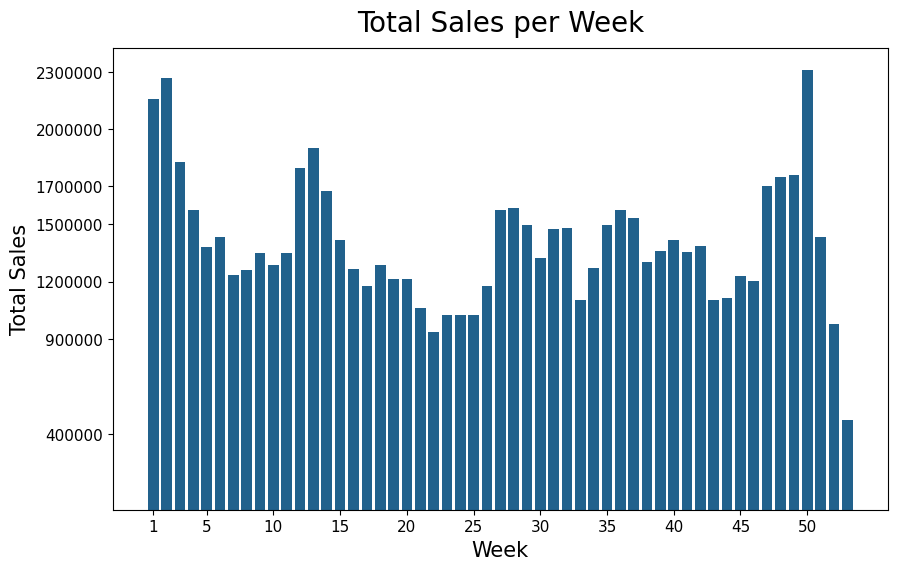

In [ ]:
# Total Sales per Week

cursor.execute('''
    SELECT
         Settimana,
        ROUND(SUM(TotalSales),2) AS Tot
    FROM (
        SELECT
           Settimana, Data,
            SUM("Sales") AS TotalSales
        FROM
            ecommerce
        GROUP BY
             Data
    ) AS subquery
    GROUP BY
    Settimana
    ORDER BY Tot desc
''')
# Fetch all the rows from the executed query
results = cursor.fetchall()

# Extract the x and y values from the query results
week = [row[0] for row in results]
totals = [row[1] for row in results]

color= ['#21618C']
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(week, totals,  color=color)
plt.xlabel("Week", fontsize=15)
plt.ylabel("Total Sales", fontsize=15)
plt.title("Total Sales per Week", fontsize=20, pad=12)
plt.xticks([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], fontsize=11)
plt.yticks(np.arange(400000, 2500000, 500000), fontsize=11)

# Set additional tick positions and labels for y-axis
additional_yticks = [ 1700000, 1200000, 400000,2300000,1500000,2000000,900000]  # Add more values as needed
plt.gca().set_yticks(additional_yticks)
plt.gca().set_yticklabels(additional_yticks)

# Show the plot
plt.show()




## Holidays

In [ ]:
italy_holidays = holidays.IT()
print(italy_holidays)

{'country': IT, 'expand': True, 'language': None, 'market': None, 'observed': True, 'subdiv': None, 'years': set()}


In [ ]:
#We store Italian holidays for the period 2012-2023 in italy-holidays
df['Data'] = pd.to_datetime(df['Data']).dt.strftime('%Y-%m-%d')
df['Holiday'] = 0  # Initialize the "Holiday" column with zeros

#we create the column Holiday in which if the date in date column is present in column holiday we assign the value 1, otherwise 0
for year in range(2012, 2024):
    italy_holidays = holidays.IT(years=year)
    holiday_dates = [date.strftime('%Y-%m-%d') for date in italy_holidays.keys()]
    df['Holiday'] = df['Holiday'] + df['Data'].isin(holiday_dates).astype(int)

In [ ]:
# We group the sales by date and holiday column, and then create a pivot table to calculate the average sales for each holiday category
b= df.groupby(['Data', 'Holiday'], as_index= False)['Sales'].sum()
b.pivot_table(index='Holiday',  values='Sales',aggfunc='mean' )

,Sales
Holiday,
0,20331.268142
1,17631.013792


# Data visualization

## Sales Percentage by Year and Sector

In [ ]:
cursor.execute('''
    SELECT
        e.Anno,
        settore,
        SUM("Sales") AS SectorSales,
        (SUM("Sales") / annual_sales) * 100 AS SalesPercentage
    FROM
        ecommerce e
    JOIN
        (SELECT Anno, SUM("Sales") AS annual_sales
         FROM ecommerce
         GROUP BY Anno) AS annual
    ON
        e.Anno = annual.Anno
    GROUP BY
        e.Anno,
        settore
    ORDER BY
        e.Anno

''')


# Fetch all the rows from the executed query
result = cursor.fetchall()

# Get the column names from the cursor description
columns = [desc[0] for desc in cursor.description]

# Create a DataFrame from the query result
a = pd.DataFrame(result, columns=columns)

# Group sectors with sales percentage < 2% as "Altro" for each year
a.loc[a['SalesPercentage'] < 2, 'settore'] = 'Altro'
a = a.groupby(['Anno', 'settore']).agg({'SectorSales': 'sum', 'SalesPercentage': 'sum'}).reset_index()
a.head(30)

,Anno,settore,SectorSales,SalesPercentage
0,2012,Altro,3.915240e+02,2.999943
1,2012,Fitness,1.007827e+04,77.221951
2,2012,Golf,9.457700e+02,7.246698
3,2012,Pesca,1.635480e+03,12.531408
4,2013,Altro,5.016959e+04,4.932899
5,2013,Calcio,2.493098e+05,24.513255
6,2013,Casual,2.038849e+05,20.046877
7,2013,Fitness,1.203015e+05,11.828586
8,2013,Pesca,2.460943e+05,24.197098
9,2013,Running,8.415474e+04,8.274472


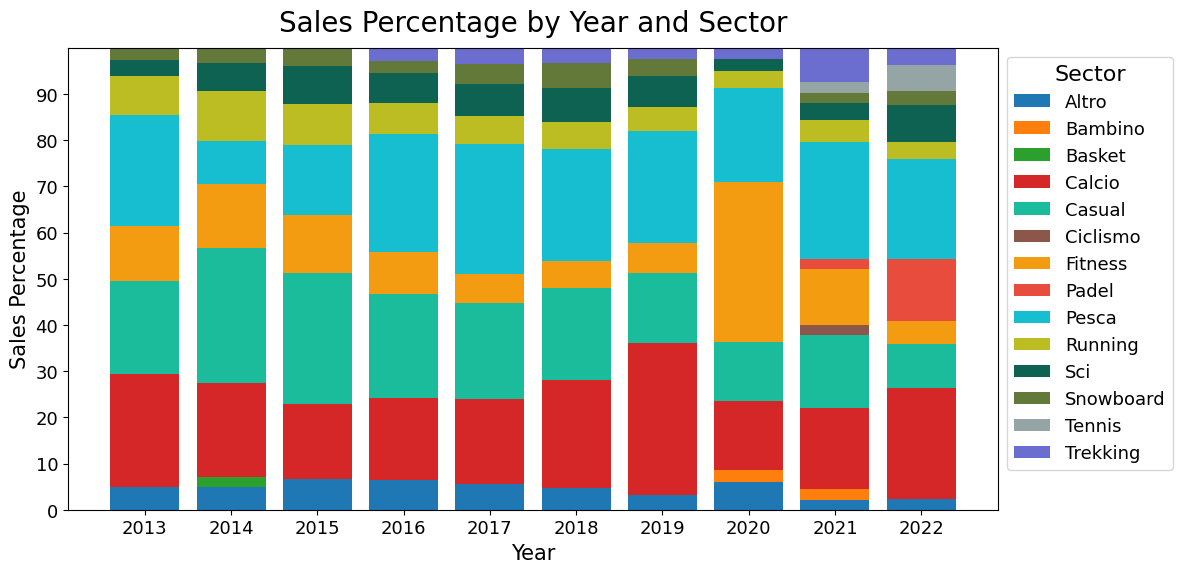

In [ ]:
# firstly, we drop the partial year 2012 and 2023
pivot_data=  a[(a['Anno'] != 2012) & (a['Anno'] != 2023)].pivot_table(index='Anno', columns='settore', values='SalesPercentage')

# we create a custom palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                  '#1ABC9C', '#8c564b', '#F39C12', '#E74C3C',
                  '#17becf', '#bcbd22', '#0E6251', '#637939',
                  '#95A5A6', '#6b6ecf', '#ad494a', '#8c6d31',
                  '#6b6ecf', '#bd9e39', '#8c6d31', '#843c39',
                  '#ad494a']
# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(pivot_data.index, pivot_data.iloc[:, 0], label=pivot_data.columns[0])

for i in range(1, pivot_data.shape[1]):
    plt.bar(pivot_data.index, pivot_data.iloc[:, i], bottom=pivot_data.iloc[:, :i].sum(axis=1), label=pivot_data.columns[i], color=custom_palette[i % len(custom_palette)])




plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales Percentage', fontsize=15)
plt.title('Sales Percentage by Year and Sector', fontsize=20, pad=12)
plt.xticks([2013, 2015, 2017, 2019, 2020, 2022,2014, 2016, 2018, 2021], fontsize=11)
plt.xticks( fontsize=13)
plt.yticks(np.arange(0, 100, 10), fontsize=13)
plt.legend(title="Sector",title_fontsize=16,bbox_to_anchor=(1., 1.00), prop={'size': 13})



# Show the plot
plt.show()


## Top selling Products

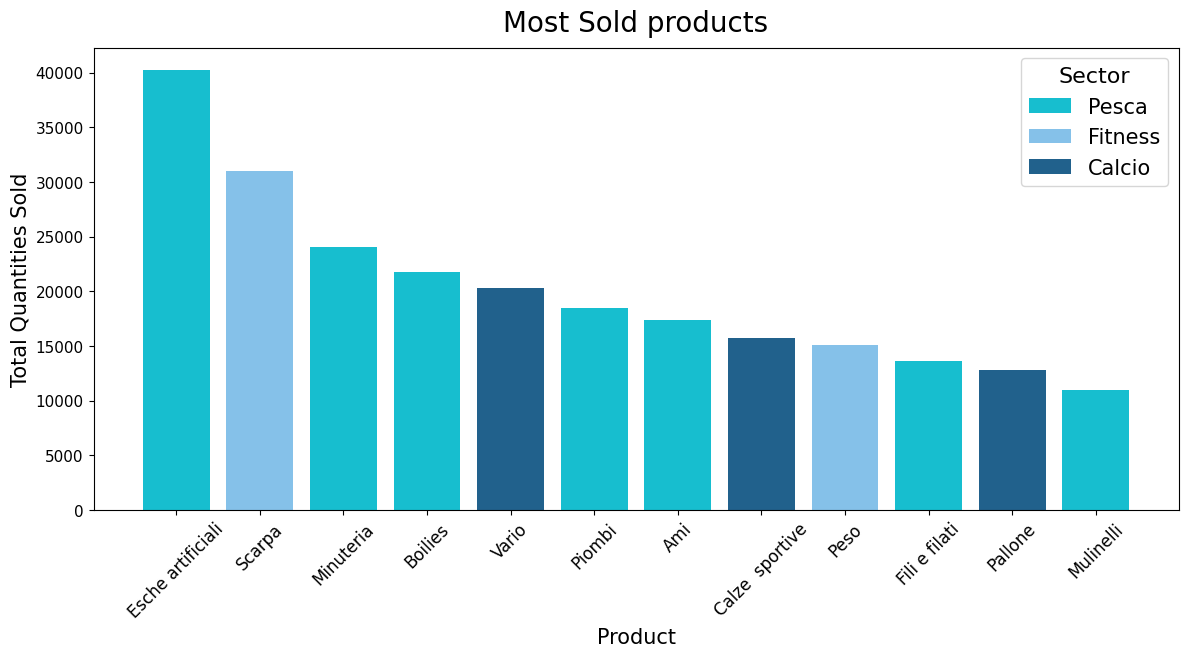

In [ ]:
# Top selling products
cursor.execute('''
    SELECT
        descrizione,
        settore,
        SUM(qta) AS TotalQuantity
    FROM
        ecommerce
    GROUP BY
        descrizione
    ORDER BY
        TotalQuantity DESC
    LIMIT 12
''')

# Fetch all the rows from the executed query
result = cursor.fetchall()
# Extract the x and y values from the query results
description = [row[0] for row in result]
sector = [row[1] for row in result]
quantities = [row[2] for row in result]

# Define the colors for each sector
sector_colors = {}
colors= ['#21618C', '#17becf', '#85C1E9']

# Assign colors to each unique sector
for i, sec in enumerate(set(sector)):
    sector_colors[sec] = colors[i % len(colors)]

# Plot the total quantities sold by each product
plt.figure(figsize=(14, 6))

# Create a set to keep track of sectors already plotted
plotted_sectors = set()

# Iterate over the bars and set the colors based on the sector
for i in range(len(description)):
    if sector[i] not in plotted_sectors:
        plt.bar(description[i], quantities[i], color=sector_colors[sector[i]], label=sector[i])
        plotted_sectors.add(sector[i])
    else:
        plt.bar(description[i], quantities[i], color=sector_colors[sector[i]])

plt.xlabel("Product", fontsize=15)
plt.ylabel("Total Quantities Sold", fontsize=15)
plt.title("Most Sold products", fontsize=20, pad=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(np.arange(0, 45000, 5000), fontsize=11)
plt.legend(title="Sector",title_fontsize=16, bbox_to_anchor=(1., 1.00), prop={'size': 15})


# Show the plot
plt.show()

## Best Performing Brand

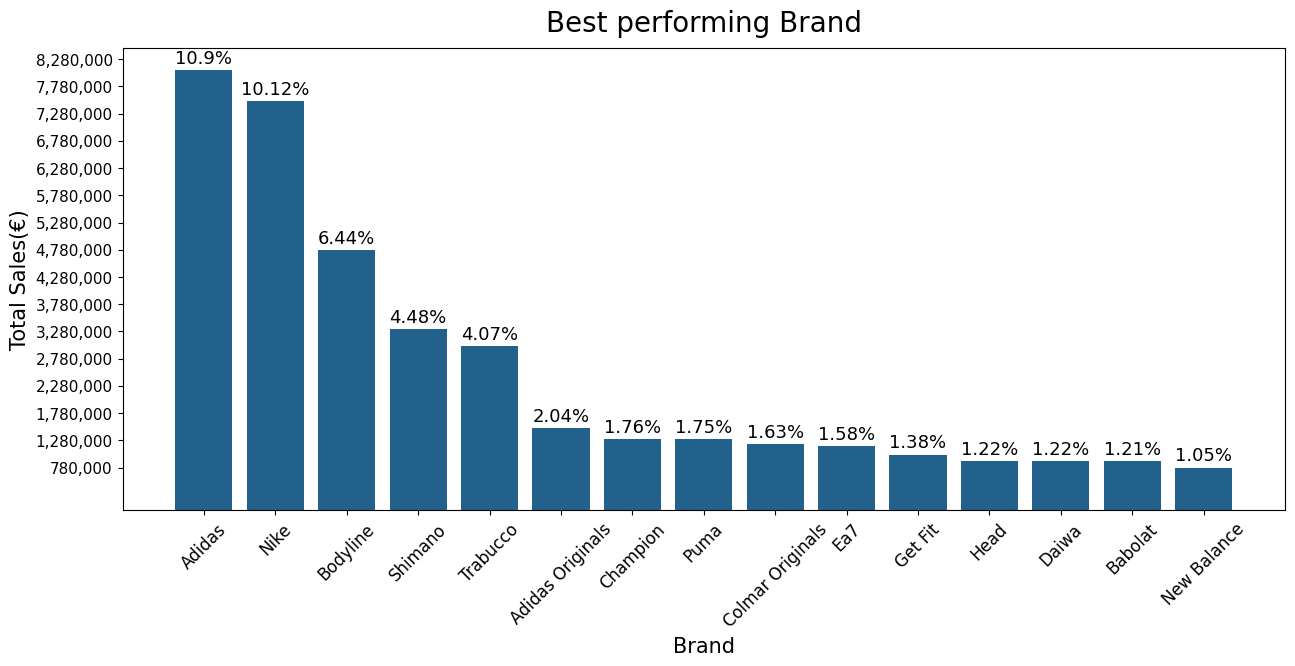

In [ ]:
#Retrieve the total sales for each brand
cursor.execute('''
    SELECT marchio,  round(SUM("Sales"),2) AS TotalSales,
     ROUND((SUM("Sales") / (SELECT SUM("Sales") FROM ecommerce)) * 100, 2) AS SalesPercentage
    FROM ecommerce
    GROUP BY marchio
    ORDER BY TotalSales DESC
    LIMIT 15
''')
result= cursor.fetchall()

# Extract the x and y values from the query results
brand = []
total_sales = []
percentage_sales= []

for row in result:
  brand.append(str(row[0]))
  total_sales.append(row[1])
  percentage_sales.append(row[2])

color= ['#21618C']
# Plot the total sales by sector
plt.figure(figsize=(15, 6))
plt.bar(brand, total_sales, color=color)
plt.xlabel("Brand", fontsize=15)
plt.ylabel("Total Sales(€)", fontsize=15)
plt.title("Best performing Brand", fontsize=20, pad=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(np.arange(780000, 8500000, 500000), fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Add the sales percentage on top of each bar (+50000, we add a little space)
for i in range(len(brand)):
    plt.text(i, total_sales[i]+ 50000, f"{percentage_sales[i]}%", ha='center', va='bottom', fontsize=13)

# Show the plot
plt.show()

In [ ]:
# We have listed all the sectors in which brands sell products
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

# Filter the DataFrame for Nike and Adidas brands
filtered_df = df[df['marchio'].isin(['Nike', 'Adidas', 'Bodyline', 'Trabucco','Adidas Originals', 'Champion', 'Puma','Colmar Originals', 'Ea7', 'Get Fit', 'Head', 'Daiwa', 'Babolat', 'New Balance'])]

# Group the filtered DataFrame by 'brand' and concatenate the 'settore' values
result = filtered_df.groupby('marchio')['settore'].unique().apply(lambda x: ', '.join(x)).reset_index()

# Rename the new column
result = result.rename(columns={'settore': 'list_sectors'})
result

<ipython-input-8-6d3145a8c334>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,marchio,list_sectors
0,Adidas,"Calcio, Casual, Fitness, Basket, Bambino, Rugby, Running, Tennis, Nuoto, Padel"
1,Adidas Originals,"Casual, Fitness, Bambino, Mare"
2,Babolat,"Tennis, Padel"
3,Bodyline,"Fitness, Freccette, Ping-pong, Basket, Arti marziali, Tennis, Pattini, Calcio, Nuoto, Baseball, Arceria, Volley, Running, Sci, Skateboard, Rugby, Soft air"
4,Champion,"Mare, Fitness, Casual, Bambino, Basket, Sci, Nuoto"
5,Colmar Originals,"Casual, Bambino, Mare, Sci"
6,Daiwa,Pesca
7,Ea7,"Casual, Sci, Mare, Bambino, Fitness"
8,Get Fit,"Fitness, Running, Arti marziali, Trekking, Volley, Bambino"
9,Head,"Tennis, Padel, Sci"


Adidas and Nike are the only sectors that generate more
than 5 million euros in sales, respectively with 10.9% and
10.12% of the total turnover. These brands offer a wide range
of products related to various sports

In [ ]:
# best time to purchase
#Retrieve the total sales for each brand
cursor.execute('''
    SELECT Hour, sum("Sales_(k€)") AS TotalSales
    FROM ecommerce
    GROUP BY Hour
    ORDER BY TotalSales desc

''')
result= cursor.fetchall()

# Extract the x and y values from the query results
Time = []
TotalSales = []



for row in result:

  Time.append(row[0])
  TotalSales.append(row[1])


# Plot the total sales by sector
plt.figure(figsize=(15, 6))
plt.barh(Time, TotalSales, align='center')
plt.xlabel("Total Sales")
plt.ylabel("Time")
plt.title("Time at which more purchases were made")
plt.xticks(rotation=45)
plt.grid(True)


# Show the plot
plt.show()



## Sales Heatmap on Hours and Days of the Week

In [ ]:
#Adding day number of the week
df['Data'] = pd.to_datetime(df['Data'])
df['giorno_settimana'] = df['Data'].dt.day_of_week

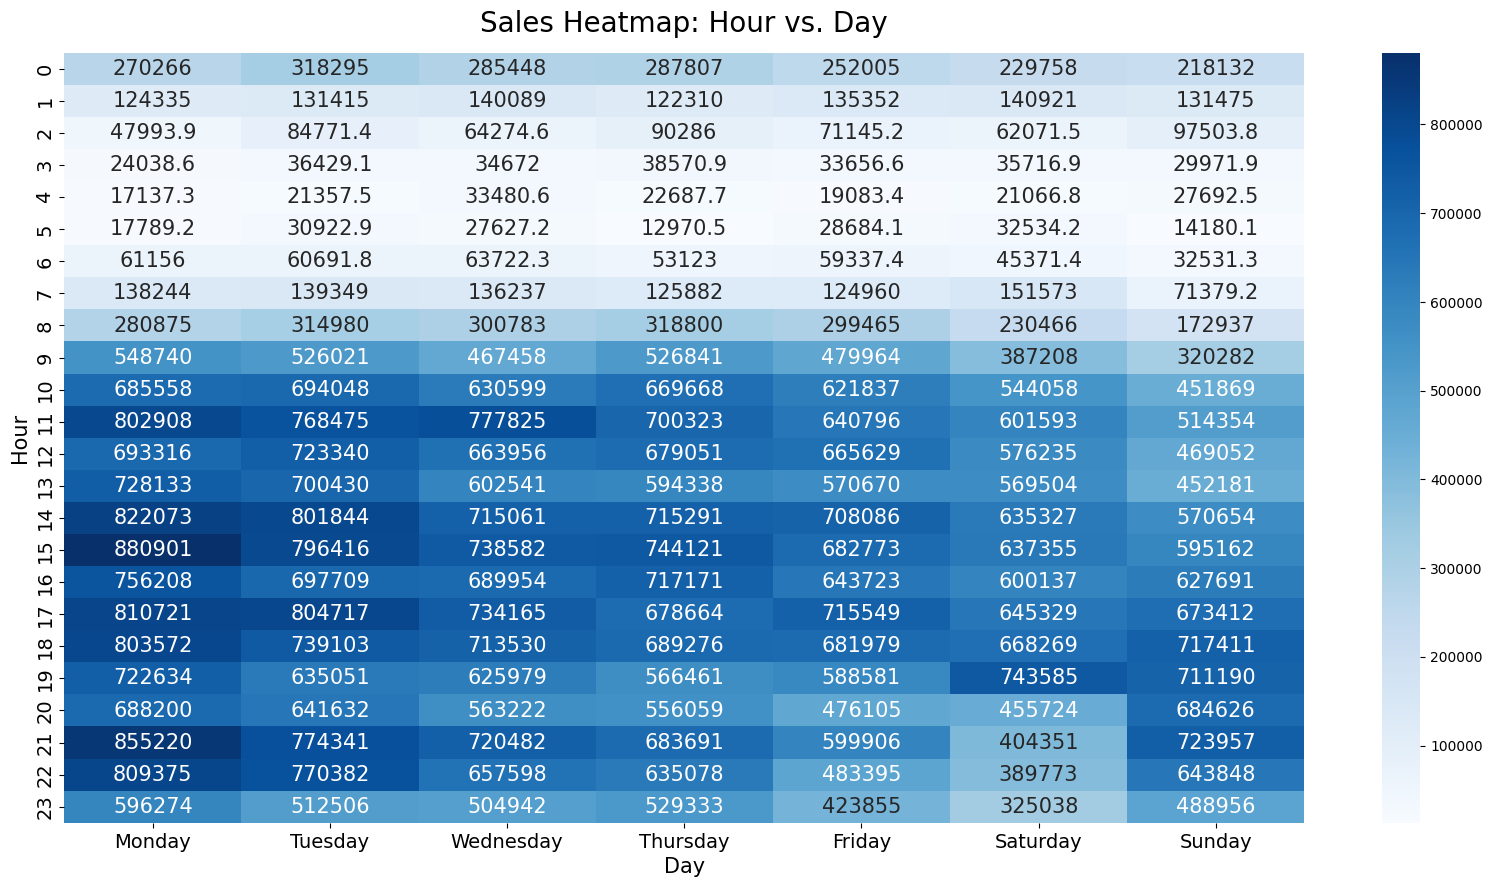

In [ ]:
# We create a pivot table named hour_day that summarizes the total sales based on the 'Hour' and 'giorno_settimana'
hour_day = df.pivot_table(index='Hour', columns='giorno_settimana',values='Sales', aggfunc='sum')

# we change the label of the weekday
hour_day.columns= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# we plot the heat map
plt.figure(figsize=(20, 10))
sns.heatmap(hour_day, cmap='Blues', annot=True, fmt='g', annot_kws={"fontsize": 15}) # g stands for automatically adjust the format
plt.xlabel('Day', fontsize=15)
plt.ylabel('Hour', fontsize=15)
plt.title('Sales Heatmap: Hour vs. Day', fontsize=20, pad=15)
plt.xticks( fontsize=14)
plt.yticks(fontsize=14)

plt.show()


## Sales Distribution by Sector (2022-02 to 2023-04)

In [ ]:
# we group the data on Mese, Anno and Settore columns. Then we calculates the sum of 'Sales' and selects the first value of 'categoria' for each group.
df1 = df.groupby(['Mese', 'Anno', 'settore'], as_index=False).agg({'Sales': 'sum', 'categoria': 'first'})
# We include only the rows where the 'settore' column has values that belong to the sectors 'Pesca', 'Calcio', 'Fitness', 'Casual', and 'Sci'
df1= df1[df1['settore'].isin(['Pesca','Calcio', 'Fitness', 'Casual', 'Sci' ])]

#Finally, we create a new column 'Anno_Mese' in the DataFrame df1 by concatenating the 'Anno' column (converted to string) and the 'Mese' column (converted to string) with a hyphen (-) in between.
df1['Anno_Mese'] = df1['Anno'].astype(str) + "-" + df1['Mese'].astype(str)


In [ ]:
# We calculate total sales by Year_Month of all sectors
total_sales = df1.groupby(['Anno_Mese'], as_index=False)['Sales'].sum()
total_sales = total_sales.rename(columns={'Sales': 'Vendite'})
# We merge the two dataset
df1 = pd.concat([df1, total_sales], ignore_index=True)



In [ ]:
# We create separate DataFrames for each specific sector and with totale dataframe we consider every sector in e-commerce
calcio= df1[df1['settore'] == 'Calcio']
casual= df1[df1['settore'] == 'Casual']
fitness= df1[df1['settore'] == 'Fitness']
pesca = df1[df1['settore'] == 'Pesca']
sci = df1[df1['settore'] == 'Sci']
totale= df1


In [ ]:
# We create a pivotal table for each sector by grouping the dataframe on Anno_Mese columns and sum the sales.
#calcio
calcio = calcio.pivot_table(index='Anno_Mese', values='Sales', aggfunc='sum')
calcio.index = calcio.index.astype(str)
#casual
casual= casual.pivot_table(index='Anno_Mese', values='Sales', aggfunc='sum')
casual.index =casual.index.astype(str)
#fitness
fitness = fitness.pivot_table(index='Anno_Mese', values='Sales', aggfunc='sum')
fitness.index = fitness.index.astype(str)
#pesca
pesca= pesca.pivot_table(index='Anno_Mese', values='Sales', aggfunc='sum')
pesca.index = pesca.index.astype(str)
#sci
sci = sci.pivot_table(index='Anno_Mese', values='Sales', aggfunc='sum')
sci.index = sci.index.astype(str)
#totale
totale = totale.pivot_table(index='Anno_Mese', values='Sales', aggfunc='sum')
totale.index = totale.index.astype(str)


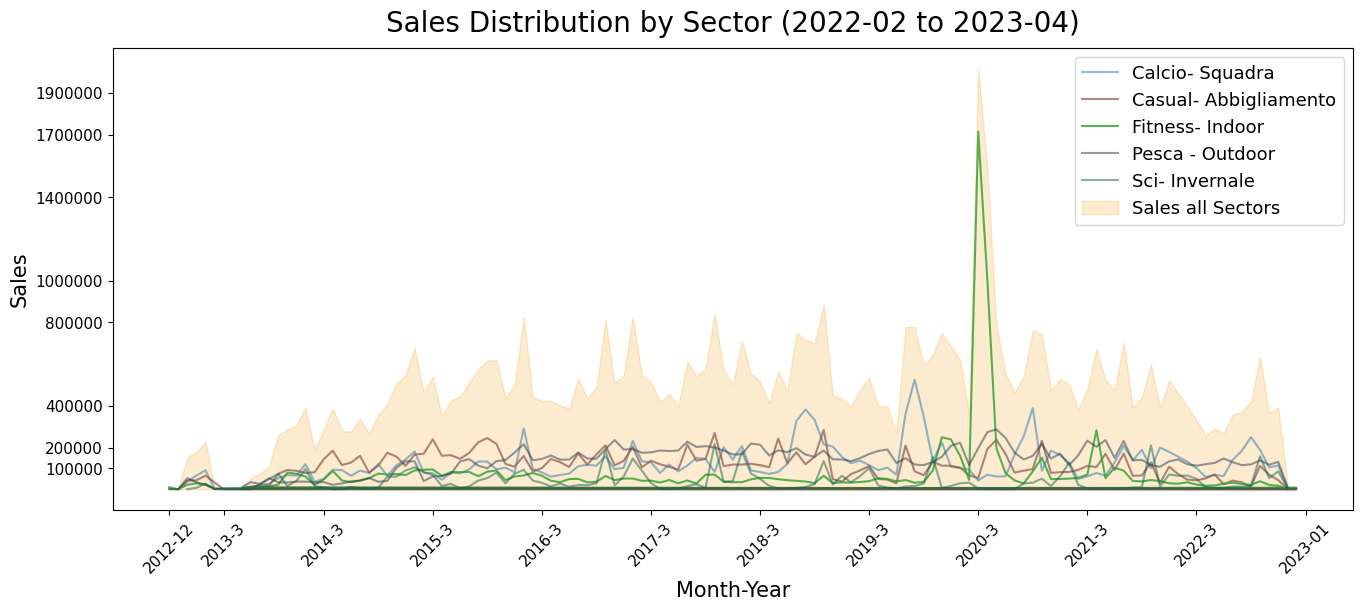

In [ ]:
# we create a custom color palette

custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#283747',
                  '#0E6251', '#8c564b', '#F39C12', '#E74C3C',
                  '#bcbd22', '#17becf', '#2980B9', '#637939',
                  '#95A5A6', '#6b6ecf', '#ad494a', '#8c6d31',
                  '#6b6ecf', '#bd9e39', '#8c6d31', '#843c39',
                  '#ad494a']

plt.figure(figsize=(16, 6))
plt.plot(calcio.index, calcio['Sales'], color=custom_palette[0], alpha=0.5, label='Calcio- Squadra')
plt.plot(casual.index, casual['Sales'], color=custom_palette[5], alpha=0.7, label='Casual- Abbigliamento')
plt.plot(fitness.index, fitness['Sales'], color=custom_palette[2], alpha=0.8, label='Fitness- Indoor')
plt.plot(pesca.index, pesca['Sales'], color=custom_palette[3], alpha=0.5, label='Pesca - Outdoor')
plt.plot(sci.index, sci['Sales'], color=custom_palette[4], alpha=0.5, label='Sci- Invernale')
plt.fill_between(totale.index, totale['Sales'], color=custom_palette[6], alpha=0.2, label='Sales all Sectors')
# Aggiunta delle etichette degli assi e del titolo del grafico
plt.xlabel('Month-Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title('Sales Distribution by Sector (2022-02 to 2023-04)', fontsize=20, pad=12)
#
plt.xticks(['2012-12', '2013-3', '2014-3', '2015-3', '2016-3', '2017-3', '2018-3', '2019-3','2020-3','2021-3', '2022-3', '2023-01'], fontsize=11, rotation= 45)
plt.yticks(np.arange(400000, 1700000, 300000), fontsize=11)

# Set additional tick positions and labels for y-axis
additional_yticks = [ 100000, 400000,200000, 800000, 1000000, 1700000, 1400000, 1900000]  # Add more values as needed
plt.gca().set_yticks(additional_yticks)
plt.gca().set_yticklabels(additional_yticks)

# Aggiunta della legenda
plt.legend(prop={'size': 13})

# Mostra il grafico
plt.show()





The graph shows the sales fluctuation over our frame
time. During the early stages of the pandemic emergency,
sales, especially those in the fitness sector, experienced an
unpredictable surge.